In [50]:
%matplotlib inline
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [51]:
df = pd.read_csv('raw_sales.csv')
df.head()
df.tail()

,datesold,postcode,price,propertyType,bedrooms
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2
29579,2019-07-26 00:00:00,2612,775000,unit,2


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


Text(0, 0.5, 'Sales')

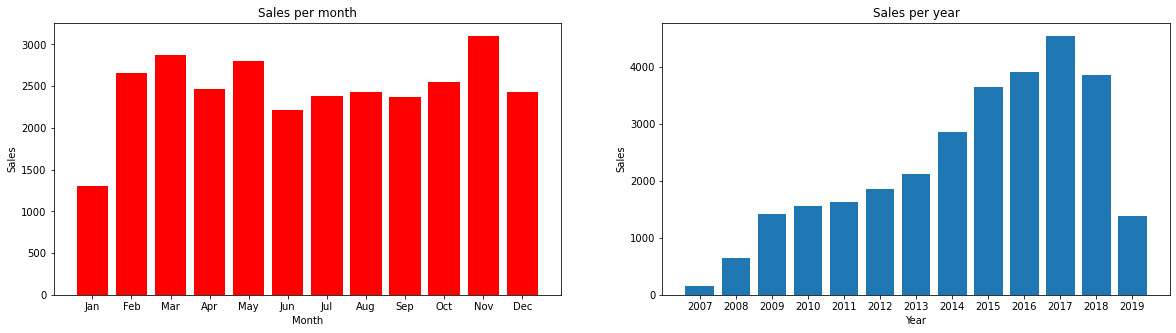

In [53]:
month = pd.to_datetime(df["datesold"]).dt.month.value_counts()
month.sort_index(ascending=True, inplace=True)
year = pd.to_datetime(df["datesold"]).dt.year.value_counts()
year.sort_index(ascending=True, inplace=True)
month_lst = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
              'Sep', 'Oct', 'Nov', 'Dec']
year_lst = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
axes[0].bar(month_lst, month, color='red')
axes[0].set_title('Sales per month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')
axes[1].bar(year_lst, year)
axes[1].set_title('Sales per year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales')

In [54]:
df['postcode'].value_counts()

2615    3566
2602    2603
2913    2558
2905    2259
2617    2115
2914    1972
2611    1864
2906    1640
2612    1210
2604    1058
2614    1058
2902    1035
2607     963
2904     919
2603     805
2605     771
2903     675
2606     659
2600     634
2912     499
2601     260
2911     249
2900     152
2620      26
2616      11
2609      10
2618       9
Name: postcode, dtype: int64

In [60]:
df['bedrooms'].value_counts()

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64

Text(0.5, 1.0, 'bedrooms')

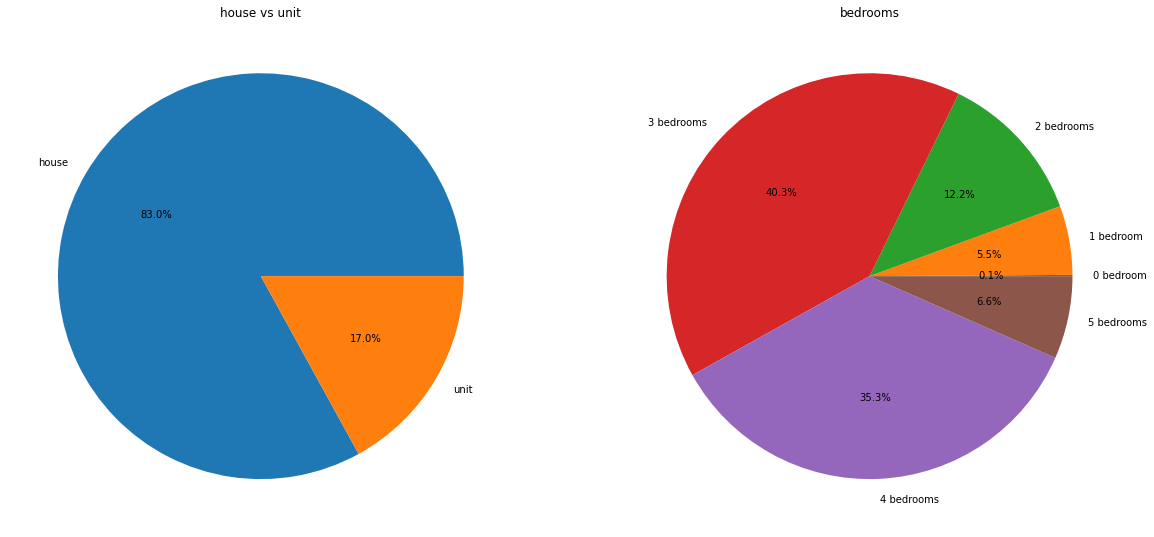

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].pie(df['propertyType'].value_counts(), labels=['house','unit'], autopct='%1.1f%%')
axes[0].set_title('house vs unit')
bedroom_labels = ['0 bedroom', '1 bedroom', '2 bedrooms', '3 bedrooms', '4 bedrooms', '5 bedrooms']
axes[1].pie(df['bedrooms'].value_counts().sort_index(ascending=True) , labels=bedroom_labels, autopct='%1.1f%%')
axes[1].set_title('bedrooms')

In [ ]:
# price difference by postcode